In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 500)

## Data import

In [26]:
df_train = pd.read_csv("/Users/victor_03/Documents/DataScience/Kaggle/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/Users/victor_03/Documents/DataScience/Kaggle/house-prices-advanced-regression-techniques/test.csv")

In [27]:
y = df_train['SalePrice']
df_full = df_train.drop(['SalePrice'], axis=1)
df_full = df_full.append(df_test, ignore_index=True)
df_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Data preprocessing
filling missing data with adapted values

In [28]:
def data_preprocessing(df):
    # We consider that houses with 'Alley' as NaN do not have alley access (door right on the street)
    df["Alley"][df["Alley"].isna()] = 'No Alley'

    # Houses with NaN for MasVnrType and MasVnrArea have no Masonry
    df["MasVnrType"][df["MasVnrType"].isna()] = 'No Masonry'
    df["MasVnrArea"][df["MasVnrArea"].isna()] = 0

    # Houses with NaN for Basement have no basement
    (df['BsmtQual'])[df['BsmtQual'].isna()] = 'No Basement'
    (df['BsmtCond'])[df['BsmtCond'].isna()] = 'No Basement'
    (df['BsmtFinType1'])[df['BsmtFinType1'].isna()] = 'No Basement'
    (df['BsmtExposure'])[df['BsmtQual']=='No Basement'] = 'No Basement'
    (df['BsmtFinType2'])[df['BsmtQual']=='No Basement'] = 'No Basement'
    (df['BsmtFinSF1'])[df['BsmtFinSF1'].isna()] = 0
    (df['BsmtFinSF2'])[df['BsmtFinSF2'].isna()] = 0
    (df['BsmtUnfSF'])[df['BsmtUnfSF'].isna()] = 0
    (df['TotalBsmtSF'])[df['TotalBsmtSF'].isna()] = 0
    

    # Houses with NaN for Garage have no garage
    (df['GarageType'])[df['GarageType'].isna()] = 'No Garage'
    (df['GarageFinish'])[df['GarageFinish'].isna()] = 'No Garage'
    (df['GarageYrBlt'])[df['GarageYrBlt'].isna()] = -1
    (df['GarageQual'])[df['GarageQual'].isna()] = 'No Garage'
    (df['GarageCond'])[df['GarageCond'].isna()] = 'No Garage'

    # Houses with NaN for Pool Quality have pool area equal to 0. Meaning there is no pool
    (df['PoolQC'])[df['PoolQC'].isna()] = 'No Pool'

    # Houses with NaN for Fence have no fence
    (df['Fence'])[df['Fence'].isna()] = 'No Fence'

    # Houses with NaN for Fireplace Quality have 0 in Fire Place. So there is no fireplace
    (df['FireplaceQu'])[df['FireplaceQu'].isna()] = 'No Fireplace'

    # Houses with NaN for Miscellaneous Features don't have any.
    (df['MiscFeature'])[df['MiscFeature'].isna()] = 'No MiscFeature'
    
    # Houses with basement but NaN for exposure have No Exposure
    df['BsmtExposure'][df['BsmtExposure'].isna()] = 'No'
    
    # Average rating of basement for the 1 missing data
    df_full['BsmtFinType2'][df_full['BsmtFinType2'].isna()] = 'ALQ'
    
    #Electrical, the 1 missing data replaced by SBrkr as the largely dominant category
    df_full['Electrical'][df_full['Electrical'].isna()] = 'SBrkr'
    
    
    df['YearBuilt'] = 2020 - df['YearBuilt']
    df['YearRemodAdd'] = 2020 - df['YearRemodAdd']
    df['YrSold'] = 2020 - df['YrSold']
    
    #To find missing data in MSZoning, I considered data in Neighborhood, as these features are associated
    #Missing data in MSZoning are in Neighboorhood 'IDOTRR' and 'Mitchel'
    #Houses in 'IDOTRR' are mostly in MSZoning 'RM'
    #Houses in 'Mitchel' are mostly in'RL'

    (df['MSZoning'])[(df['MSZoning'].isna()) & (df['Neighborhood']=='IDOTRR')] = 'RM'
    (df['MSZoning'])[(df['MSZoning'].isna()) & (df['Neighborhood']=='Mitchel')] = 'RL'

    ### Utilities

    # Utilities are always 'AllPub, so I replace missing data'
    df['Utilities'][df['Utilities'].isna()] = 'AllPub'

    ### Exterior

    # The house with missing data is obviously a house as it is a flat (so no bare field). So I set Exterior1st and 2nd as 'Other'
    (df['Exterior1st'])[df['Exterior1st'].isna()] = 'Other'
    (df['Exterior2nd'])[df['Exterior2nd'].isna()] = 'Other'

    ### Bathroom
    #houses with no basement have 0 basement bathroom

    df['BsmtFullBath'][df['BsmtFullBath'].isna()] = 0
    df['BsmtHalfBath'][df['BsmtHalfBath'].isna()] = 0

    ### Kitchen
    #Houses with missing data for quality of kitchen are categorized as middle quality

    df['KitchenQual'][df['KitchenQual']==0] = 'TA'
    df['KitchenQual'][df['KitchenQual'].isna()] = 'TA'

    ### Functional
    #As explained in data description, assumed typical unless specific information

    df['Functional'][df['Functional'].isna()] = 'Typ'
    df['Functional'][df['Functional']==0] = 'Typ'

    ### Garage
    #Houses with missing data for GarageCars and GarageArea have no garage

    df['GarageCars'][df['GarageCars'].isna()] = 0
    df['GarageArea'][df['GarageArea'].isna()] = 0

    ### Sale type
    #Missing sale type are put as 'Other

    df['SaleType'][df['SaleType'].isna()]='Oth'
    df['SaleType'][df['SaleType']==0]='Oth'
    
    
    return df

In [29]:
df_full = data_preprocessing(df_full)

/Users/victor_03/opt/anaconda3/envs/Tenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/victor_03/opt/anaconda3/envs/Tenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/victor_03/opt/anaconda3/envs/Tenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

Check if no more missing values, unless for lotFrontage that will be predicted by a regression model

In [30]:
nan_values=pd.DataFrame(columns=df_full.isna().sum().index)
nan_values.loc[0] = df_full.isna().sum().values
nan_values

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,0,0,486,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Encoding of the features: 
standard transformation for numerical features
categorization for text features

In [31]:
#list of categorical features
categorical_features = list()
#list of continuous features
continuous_features = list()

for feature in df_full.columns:
    if type(df_full[feature][0])==str:
        categorical_features.append(feature)
    elif type(df_full[feature][0])==np.int64 or type(df_full[feature][0])==np.float64:
        continuous_features.append(feature)
        
continuous_features.remove('Id')

In [32]:
#categorical features are transormed with a label encoder
le_categorical = dict()
#continuous features are standardized
scaler_continuous = dict()
for feature in categorical_features:
    le=LabelEncoder()
    le.fit(df_full[feature].unique())
    df_full[feature] = le.transform(df_full[feature].values)
    df_full[feature] = df_full[feature].astype('category')
    le_categorical[feature]=le
for feature in continuous_features:
    scaler = StandardScaler()
    scaler.fit(df_full[feature].values.reshape(len(df_full[feature]), 1))
    df_full[feature]=scaler.transform(df_full[feature].values.reshape(len(df_full[feature]), 1))
    scaler_continuous[feature]=scaler
    
    
scaler = StandardScaler()
scaler.fit(y.values.reshape(len(y), 1))
y=scaler.transform(y.values.reshape(len(y), 1))
scaler_continuous['SalePrice']=scaler

### Prediction of LotFrontage for missing data using RF with 100 estimators

In [33]:
df_frontage = df_full[df_full['LotFrontage'].notnull()]
y_frontage = np.array(df_frontage['LotFrontage'].values)
df_frontage = df_frontage.drop(['LotFrontage'], axis=1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_frontage, y_frontage, random_state=42, test_size=.3)

mse:  0.41033356354523015


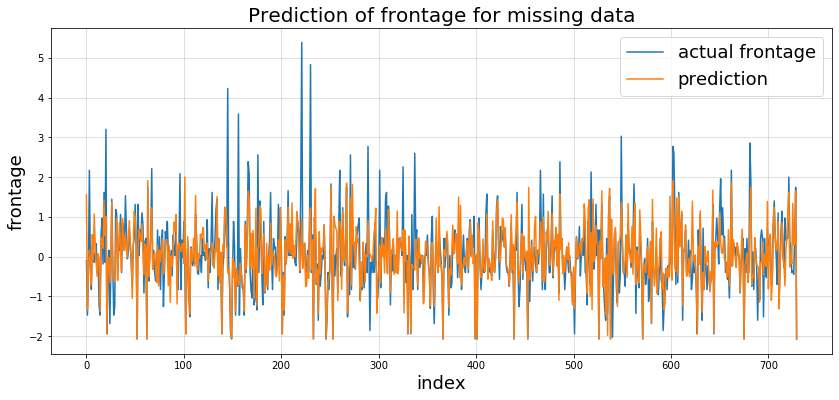

In [35]:
clf = RandomForestRegressor(max_depth=100, random_state=0)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('mse: ', mean_squared_error(y_test, prediction))
fig, ax = plt.subplots(figsize=(14, 6))
plt.plot(y_test, label='actual frontage')
plt.plot(prediction, label='prediction')
plt.xlabel('index', fontsize=18)
plt.ylabel('frontage', fontsize=18)
plt.title('Prediction of frontage for missing data', fontsize = 20)
plt.grid(alpha=.5)
plt.legend(fontsize=18)

Validation of the model. Now it is re-trained on the whole dataset of non-missing data

In [36]:
clf_total = RandomForestRegressor(max_depth=100, random_state=0)
clf_total.fit(df_frontage, y_frontage)
prediction = clf_total.predict(df_full[df_full['LotFrontage'].isna()].drop(['LotFrontage'], axis=1))

In [37]:
df_full['LotFrontage'][df_full['LotFrontage'].isna()] = prediction

/Users/victor_03/opt/anaconda3/envs/Tenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df=pd.DataFrame()
for col in categorical_features:
    dummies = pd.get_dummies(df_full[col],prefix=col)
    df = pd.concat([df,dummies],axis=1)

In [44]:
#cont_features_no_price = continuous_features.remove('SalePrice')
df = pd.concat([df, df_full[continuous_features]], axis=1)

In [48]:
df['Id'] = df_full['Id']

In [49]:
df.head()

,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_0,Street_1,Alley_0,Alley_1,Alley_2,LotShape_0,LotShape_1,LotShape_2,LotShape_3,LandContour_0,LandContour_1,LandContour_2,LandContour_3,Utilities_0,Utilities_1,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,LandSlope_0,LandSlope_1,LandSlope_2,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,Condition1_5,Condition1_6,Condition1_7,Condition1_8,Condition2_0,Condition2_1,Condition2_2,Condition2_3,Condition2_4,Condition2_5,Condition2_6,Condition2_7,BldgType_0,BldgType_1,BldgType_2,BldgType_3,BldgType_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofStyle_5,RoofMatl_0,RoofMatl_1,RoofMatl_2,RoofMatl_3,RoofMatl_4,RoofMatl_5,RoofMatl_6,RoofMatl_7,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,Exterior1st_8,Exterior1st_9,Exterior1st_10,Exterior1st_11,Exterior1st_12,Exterior1st_13,Exterior1st_14,Exterior1st_15,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,Exterior2nd_5,Exterior2nd_6,Exterior2nd_7,Exterior2nd_8,Exterior2nd_9,Exterior2nd_10,Exterior2nd_11,Exterior2nd_12,Exterior2nd_13,Exterior2nd_14,Exterior2nd_15,MasVnrType_0,MasVnrType_1,MasVnrType_2,MasVnrType_3,MasVnrType_4,ExterQual_0,ExterQual_1,ExterQual_2,ExterQual_3,ExterCond_0,ExterCond_1,ExterCond_2,ExterCond_3,ExterCond_4,Foundation_0,Foundation_1,Foundation_2,Foundation_3,Foundation_4,Foundation_5,BsmtQual_0,BsmtQual_1,BsmtQual_2,BsmtQual_3,BsmtQual_4,BsmtCond_0,BsmtCond_1,BsmtCond_2,BsmtCond_3,BsmtCond_4,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType2_0,BsmtFinType2_1,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,BsmtFinType2_6,Heating_0,Heating_1,Heating_2,Heating_3,Heating_4,Heating_5,HeatingQC_0,HeatingQC_1,HeatingQC_2,HeatingQC_3,HeatingQC_4,CentralAir_0,CentralAir_1,Electrical_0,Electrical_1,Electrical_2,Electrical_3,Electrical_4,KitchenQual_0,KitchenQual_1,KitchenQual_2,KitchenQual_3,Functional_0,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,Functional_6,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,FireplaceQu_4,FireplaceQu_5,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageFinish_3,GarageQual_0,GarageQual_1,GarageQual_2,GarageQual_3,GarageQual_4,GarageQual_5,GarageCond_0,GarageCond_1,GarageCond_2,GarageCond_3,GarageCond_4,GarageCond_5,PavedDrive_0,PavedDrive_1,PavedDrive_2,PoolQC_0,PoolQC_1,PoolQC_2,PoolQC_3,Fence_0,Fence_1,Fence_2,Fence_3,Fence_4,MiscFeature_0,MiscFeature_1,MiscFeature_2,MiscFeature_3,MiscFeature_4,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Id
0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [50]:
df_train = df.iloc[:1460]
df_test = df[1460:]
df_train['SalePrice'] = y

continuous_features.append('SalePrice')

/Users/victor_03/opt/anaconda3/envs/Tenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [202]:
df_train.to_csv("/Users/victor_03/Documents/DataScience/Kaggle/house-prices-advanced-regression-techniques/cleansed_trainset.csv")
df_test.to_csv("/Users/victor_03/Documents/DataScience/Kaggle/house-prices-advanced-regression-techniques/cleansed_testset.csv")


pickle.dump(categorical_features, open("/Users/victor_03/Documents/DataScience/Kaggle/house-prices-advanced-regression-techniques/categorical_features.txt", 'wb'))
pickle.dump(continuous_features, open("/Users/victor_03/Documents/DataScience/Kaggle/house-prices-advanced-regression-techniques/continuous_features.txt", 'wb'))
pickle.dump(scaler_continuous, (open("/Users/victor_03/Documents/DataScience/Kaggle/house-prices-advanced-regression-techniques/scaler_continuous.txt", 'wb')))
pickle.dump(le_categorical, (open("/Users/victor_03/Documents/DataScience/Kaggle/house-prices-advanced-regression-techniques/le_categorical.txt", 'wb')))

In [51]:
df_train.to_csv("/Users/victor_03/Documents/DataScience/Kaggle/house-prices-advanced-regression-techniques/cleansed_trainset_OHE.csv")
df_test.to_csv("/Users/victor_03/Documents/DataScience/Kaggle/house-prices-advanced-regression-techniques/cleansed_testset_OHE.csv")

